# 변수 형식 처리 및 파생변수 생성

### 주요 내용

1. 변수 수정, 추가 및 제거
2. 형식 변환
3. 결측값 처리 및 파생변수 생성

<br>

### 목표 
1. 분석 목적에 맞게 변수를 수정하고 파생 변수를 추가할 수 있다.
2. 날짜 등 변수 형식을 활용할 수 있다.
3. 결측값을 적절한 값으로 대체하는 방법을 확인한다.


<br>
<hr>
<br>

<br>

## 1. 변수(열)의 수정, 추가, 제거

**pandas**의 기본 기능과 메서드를 활용하여 변수를 추가 하거나 수정, 업데이트하거나 제거할 수 있습니다.  
변수를 선택하듯 **=**을 활용해서 변수를 추가하거나 업데이트 할 수 있습니다. 

### 1.1. 변수 수정 및 추가

In [74]:
# 라이브러리 불러오기
import pandas as pd


# 예제 만들기 : 딕셔너리를 활용한 DataFrame 생성
df_own = pd.DataFrame({'FIRST' : ['A', 'B', 'C', 'D'],
                       'SECOND': [7,6,5,8], 
                       'THIRD' : pd.date_range('2023-01-01', periods=4, freq='W-SAT')})
df_own

,FIRST,SECOND,THIRD
0,A,7,2023-01-07
1,B,6,2023-01-14
2,C,5,2023-01-21
3,D,8,2023-01-28


In [75]:
# 변수이름을 활용한 변수선택
df_own['SECOND']

0    7
1    6
2    5
3    8
Name: SECOND, dtype: int64

In [76]:
# =을 활용한 추가
df_own['FOURTH'] = 0
df_own

,FIRST,SECOND,THIRD,FOURTH
0,A,7,2023-01-07,0
1,B,6,2023-01-14,0
2,C,5,2023-01-21,0
3,D,8,2023-01-28,0


In [77]:
# =을 활용한 업데이트
df_own['FOURTH'] = df_own['SECOND'] + 1
df_own

,FIRST,SECOND,THIRD,FOURTH
0,A,7,2023-01-07,8
1,B,6,2023-01-14,7
2,C,5,2023-01-21,6
3,D,8,2023-01-28,9


<br>

### 1.2. 객체 메서드와 Series 메서드의 비교

특히 날짜시간 변수의 경우 월, 일, 요일, 시간 등 다양한 요소를 추출해서 변수로 추가할 수 있는데, 객체 자체의 메서드를 활용하거나 **pandas**의 함수를 활용할 수 있습니다.  

Python은 개발언어로 객체의 형식에 매우 엄격합니다. 개별 날짜에 적용할 수 있는 메서드는 **pandas**의 **Series**에는 적용할 수 없기 때문에 *apply()*등을 활용해야 합니다.

In [78]:
# []와 for를 활용한 파생변수 생성
df_own.loc[0, 'THIRD'].weekday()
    ## 하나의 값에 대해서는 메서드 활용가능

5

In [79]:
# Series에 대해서는 Series의 메서드만 활용 가능
# df_own['THIRD'].weekday()

In [80]:
df_own['THIRD'].apply(lambda x: x.weekday())

0    5
1    5
2    5
3    5
Name: THIRD, dtype: int64

<br>

pandas의 *dt.weekday*를 활용하면 훨씬 손쉽게 파생변수를 만들수 있습니다.
 * 참고: [dt.weekday](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.weekday.html)

In [81]:
# pandas의 dt.weekday 활용
df_own['THIRD'].dt.weekday

0    5
1    5
2    5
3    5
Name: THIRD, dtype: int64

In [82]:
df_own['WEEKDAY'] = df_own['THIRD'].dt.weekday
df_own

,FIRST,SECOND,THIRD,FOURTH,WEEKDAY
0,A,7,2023-01-07,8,5
1,B,6,2023-01-14,7,5
2,C,5,2023-01-21,6,5
3,D,8,2023-01-28,9,5


<br>

### 1.3. 조건을 활용한 값 생성 및 변수 제거

조건을 활용해 일부 관측치를 선택하듯이, 조건을 설정하고 변수를 추가하거나 업데이트 하는 것도 가능합니다.

In [83]:
# 일부 관측치만 값 생성
df_own.loc[df_own['FIRST'].isin(['A','B']), 'OPTIONAL'] = 1
df_own
    ## NaN := 결측값(missing)

,FIRST,SECOND,THIRD,FOURTH,WEEKDAY,OPTIONAL
0,A,7,2023-01-07,8,5,1.0
1,B,6,2023-01-14,7,5,1.0
2,C,5,2023-01-21,6,5,NaN
3,D,8,2023-01-28,9,5,NaN


<br>

*drop()*은 관측치와 변수를 제거할 수 있는데 **index**와 **columns**를 활용합니다. `axis=`옵션에 따라 `axis=0`이면 관측치를 제거하거 `axis=1`이면 변수를 제거합니다.  

`columns=`이라는 옵션을 명시해서 변수를 제거하는 것이 가장 명확하고 실수를 줄일 수 있습니다. 

In [84]:
# drop()을 활용한 관측치/변수 제거
df_own.drop('FOURTH', axis=1)
    # axis = 0 : 관측치
    # axis = 1 : 변수


,FIRST,SECOND,THIRD,WEEKDAY,OPTIONAL
0,A,7,2023-01-07,5,1.0
1,B,6,2023-01-14,5,1.0
2,C,5,2023-01-21,5,NaN
3,D,8,2023-01-28,5,NaN


In [85]:
# drop()을 활용한 관측치/변수 제거(columns 활용)
df_own.drop(columns=['FOURTH'])

  

,FIRST,SECOND,THIRD,WEEKDAY,OPTIONAL
0,A,7,2023-01-07,5,1.0
1,B,6,2023-01-14,5,1.0
2,C,5,2023-01-21,5,NaN
3,D,8,2023-01-28,5,NaN


In [86]:
# drop( ) 실행 후 원본 데이터는 변함이 없음
df_own

,FIRST,SECOND,THIRD,FOURTH,WEEKDAY,OPTIONAL
0,A,7,2023-01-07,8,5,1.0
1,B,6,2023-01-14,7,5,1.0
2,C,5,2023-01-21,6,5,NaN
3,D,8,2023-01-28,9,5,NaN


In [87]:
# 원본 데이터의 업데이트
df_own = df_own.drop(columns=['FOURTH'])
df_own

,FIRST,SECOND,THIRD,WEEKDAY,OPTIONAL
0,A,7,2023-01-07,5,1.0
1,B,6,2023-01-14,5,1.0
2,C,5,2023-01-21,5,NaN
3,D,8,2023-01-28,5,NaN


In [88]:
# 리스트를 활용한 복수 인덱스 제거
df_own = df_own.drop([0,3], axis=0)
df_own

,FIRST,SECOND,THIRD,WEEKDAY,OPTIONAL
1,B,6,2023-01-14,5,1.0
2,C,5,2023-01-21,5,NaN


<br>

### 1.4. 결측값 대체 예제

**DataFrame**에서 결측값은 *NaN*으로 표시됩니다. 특정한 변수를 기준으로 각 관측치의 결측여부를 따지는 함수는 *isnull()*이고 기존의 방법을 조합해서 아래처럼 간단하게 결측값을 적절하게 대체할 수 있습니다.  
결측값 대체는 아래에서 다시 한번 더 다루겠습니다.

In [89]:
df_own.loc[df_own['OPTIONAL'].isnull()]

,FIRST,SECOND,THIRD,WEEKDAY,OPTIONAL
2,C,5,2023-01-21,5,NaN


In [90]:
df_own.loc[df_own['OPTIONAL'].isnull(), 'OPTIONAL']  = 0.1
df_own

,FIRST,SECOND,THIRD,WEEKDAY,OPTIONAL
1,B,6,2023-01-14,5,1.0
2,C,5,2023-01-21,5,0.1


<br>

### 1.5. 변수 이름 변경

변수이름을 바꾸고 싶을 때는 **DataFrame**의 메서드 *rename()*을 활용할 수 있습니다.  
이때 `columns=` 옵션을 활용하고 딕셔너리 형식으로 기존변수이름과 새변수이름을 콜론으로 연결하면 됩니다. 

In [91]:
# rename() 활용 변수 이름 바꾸기 
df_own.rename(columns = {'FIRST':'var1', 'SECOND':'var2'})

,var1,var2,THIRD,WEEKDAY,OPTIONAL
1,B,6,2023-01-14,5,1.0
2,C,5,2023-01-21,5,0.1


<br>

#### [실습] df_sp를 활용

1. 'math score', 'reading score', 'writing score'를 합한 변수 'total' 추가
2. 1의 'total'이 270이상인 학생들만 'EX'라는 값을 갖는 'grade' 변수 추가
3. 'math score'가 40보다 작은지 비교 연산하고 True/False 값을 갖는 결과 Series를 변수 'math grp'로 추가하기
4. 'reading score'가 40보다 작은지 비교 연산하고 결과를 'reading grp'로 추가하기
5. 'writing score'가 40보다 작은지 비교 연산하고 결과를 'writing grp'로 추가하기
6. 3., 4., 5.를 활용해서 세 점수 중 하나라도 40점 미만은 학생은 'grade'를 'FAIL'로 수정하기
7. 3., 4., 5.의 세 변수를 제거하기
8. 'grade'의 이름을 'class'로 바꾸기


In [162]:
df_sp = pd.read_csv('data/StudentsPerformance.csv')
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [163]:
df_sp['total'] = df_sp['math score']+df_sp['writing score'] +df_sp['reading score']
df_sp.loc[df_sp['total']>=270 ,'grade'] = 'EX'
df_sp = pd.concat([df_sp,(df_sp['math score']<40).rename('math grp'),(df_sp['reading score']<40).rename('reading grp'),(df_sp['writing score']<40).rename('writing grp')] ,axis = 1)
df_sp

# df_sp['math grp'] = df_sp['math score'] < 40 
# df_sp['reading grp'] = df_sp['reading score'] < 40 
# df_sp['writing grp'] = df_sp['writing score'] < 40 
#이렇게 추가 해도 됨 


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,grade,math grp,reading grp,writing grp
0,female,group B,bachelor's degree,standard,none,72,72,74,218,NaN,False,False,False
1,female,group C,some college,standard,completed,69,90,88,247,NaN,False,False,False
2,female,group B,master's degree,standard,none,90,95,93,278,EX,False,False,False
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,NaN,False,False,False
4,male,group C,some college,standard,none,76,78,75,229,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,EX,False,False,False
996,male,group C,high school,free/reduced,none,62,55,55,172,NaN,False,False,False
997,female,group C,high school,free/reduced,completed,59,71,65,195,NaN,False,False,False
998,female,group D,some college,standard,completed,68,78,77,223,NaN,False,False,False


In [164]:
df_sp.loc[(df_sp['math grp']==True) | (df_sp['reading grp']==True) | (df_sp['writing grp']==True) ,'grade'] = 'FAIL'
df_sp = df_sp = df_sp.drop(columns=['math grp', 'reading grp', 'writing grp'])
df_sp

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,NaN
1,female,group C,some college,standard,completed,69,90,88,247,NaN
2,female,group B,master's degree,standard,none,90,95,93,278,EX
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,NaN
4,male,group C,some college,standard,none,76,78,75,229,NaN
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,EX
996,male,group C,high school,free/reduced,none,62,55,55,172,NaN
997,female,group C,high school,free/reduced,completed,59,71,65,195,NaN
998,female,group D,some college,standard,completed,68,78,77,223,NaN


In [176]:
df_sp = df_sp.rename(columns = {'grade':'CLASS'})
df_sp.loc[df_sp['CLASS']=='FAIL']
df_sp.value_counts('CLASS')

CLASS
EX      52
FAIL    51
dtype: int64

#### [참고] DataFrame의 sum(), any()등 활용 가능

<br>
<hr>
<br>

## 2. 결측값 처리

결측값은 다양한 이유로 생길 수 있습니다.  
- 애초에 값이 없는 경우
- 값이 있으나 사람 실수로 누락한 경우
- 센서, 통신망 등의 오류로 값이 들어오지 않은 경우

먼저 결측값 존재 여부 확인하고, 대체를 할 지 그대로 둘 지를 결정해야 합니다. 대체를 한다면 어떤 값으로 채울지도 고민해야합니다.

In [180]:
# 예제 데이터 불러오기
df_na = pd.read_csv('./data/data_dupna.csv')
df_na
    # NaN : 결측

,id,product_cd,date,amount,channel,info1,info2,info3
0,101,A,2022-01-03,20.0,FC,C887,N,NaN
1,101,C,2022-05-03,120.0,FC,C887,NaN,NaN
2,101,B,2022-04-12,32.0,FC,C887,NaN,N
3,103,C,2022-03-03,NaN,CM,NaN,NaN,NaN
4,103,B,2022-03-02,25.0,FC,C453,NaN,N
5,105,C,2022-02-23,92.0,CM,NaN,NaN,NaN
6,201,B,2022-02-16,31.0,FC,C453,NaN,NaN
7,204,A,2022-04-11,15.0,CM,NaN,Y,NaN
8,204,B,2022-04-11,18.0,CM,NaN,NaN,N


<br>
아래의 명령어를 활용하면 전체 데이터에서 결측값이 있는 관측치나 변수를 확인할 수 있습니다. 


In [181]:
# 하나라도 결측값이 있는 변수 확인
df_na.isnull().any(axis=0)

id            False
product_cd    False
date          False
amount         True
channel       False
info1          True
info2          True
info3          True
dtype: bool

In [182]:
# 하나라도 결측값이 있는 관측치 확인
df_na[df_na.isnull().any(axis=1)]

,id,product_cd,date,amount,channel,info1,info2,info3
0,101,A,2022-01-03,20.0,FC,C887,N,NaN
1,101,C,2022-05-03,120.0,FC,C887,NaN,NaN
2,101,B,2022-04-12,32.0,FC,C887,NaN,N
3,103,C,2022-03-03,NaN,CM,NaN,NaN,NaN
4,103,B,2022-03-02,25.0,FC,C453,NaN,N
5,105,C,2022-02-23,92.0,CM,NaN,NaN,NaN
6,201,B,2022-02-16,31.0,FC,C453,NaN,NaN
7,204,A,2022-04-11,15.0,CM,NaN,Y,NaN
8,204,B,2022-04-11,18.0,CM,NaN,NaN,N


<br>

#### [참고]
집계 함수의 경우 결측값이 있는 경우 결측값을 제외하고 계산하도록 기본값이 설정되어 있습니다. 

In [29]:
df_na['amount'].mean(), df_na['amount'].mean(skipna=False)

(44.125, nan)

<br>

### 2.1. 결측값 포함 관측치 제거

결측값이 있는 관측치에 대응하는 가장 간단한 방법은 결측치를 포함한 변수나 관측치를 제거하는 방법입니다. 

In [30]:
# 하나라도 결측값이 있는 관측치 제거
df_na.dropna()

,id,product_cd,date,amount,channel,info1,info2,info3


In [31]:
# 특정 변수 기준 결측값이 있는 관측치 제거
df_na.dropna(subset=['info1'])

,id,product_cd,date,amount,channel,info1,info2,info3
0,101,A,2022-01-03,20.0,FC,C887,N,NaN
1,101,C,2022-05-03,120.0,FC,C887,NaN,NaN
2,101,B,2022-04-12,32.0,FC,C887,NaN,N
4,103,B,2022-03-02,25.0,FC,C453,NaN,N
6,201,B,2022-02-16,31.0,FC,C453,NaN,NaN


<br>

### 2.2. 결측값 대체

다음으로 결측값을 적절한 값으로 대체할 수 있습니다.

In [32]:
# 모든 결측값을 일괄 대체
df_na.fillna(value=0)

,id,product_cd,date,amount,channel,info1,info2,info3
0,101,A,2022-01-03,20.0,FC,C887,N,0
1,101,C,2022-05-03,120.0,FC,C887,0,0
2,101,B,2022-04-12,32.0,FC,C887,0,N
3,103,C,2022-03-03,0.0,CM,0,0,0
4,103,B,2022-03-02,25.0,FC,C453,0,N
5,105,C,2022-02-23,92.0,CM,0,0,0
6,201,B,2022-02-16,31.0,FC,C453,0,0
7,204,A,2022-04-11,15.0,CM,0,Y,0
8,204,B,2022-04-11,18.0,CM,0,0,N


In [183]:
# 변수별 결측값 대체 지정
df_na.fillna(value={'info1':0, 'info2':'NA'})
df_na

,id,product_cd,date,amount,channel,info1,info2,info3
0,101,A,2022-01-03,20.0,FC,C887,N,NaN
1,101,C,2022-05-03,120.0,FC,C887,NaN,NaN
2,101,B,2022-04-12,32.0,FC,C887,NaN,N
3,103,C,2022-03-03,NaN,CM,NaN,NaN,NaN
4,103,B,2022-03-02,25.0,FC,C453,NaN,N
5,105,C,2022-02-23,92.0,CM,NaN,NaN,NaN
6,201,B,2022-02-16,31.0,FC,C453,NaN,NaN
7,204,A,2022-04-11,15.0,CM,NaN,Y,NaN
8,204,B,2022-04-11,18.0,CM,NaN,NaN,N


In [187]:
# 가장 앞쪽의 결측이 아닌 값으로 대체
    ## 센서 등의 값 누락에 활용
df_na.fillna(method='ffill')



,id,product_cd,date,amount,channel,info1,info2,info3
0,101,A,2022-01-03,20.0,FC,C887,N,NaN
1,101,C,2022-05-03,120.0,FC,C887,N,NaN
2,101,B,2022-04-12,32.0,FC,C887,N,N
3,103,C,2022-03-03,32.0,CM,C887,N,N
4,103,B,2022-03-02,25.0,FC,C453,N,N
5,105,C,2022-02-23,92.0,CM,C453,N,N
6,201,B,2022-02-16,31.0,FC,C453,N,N
7,204,A,2022-04-11,15.0,CM,C453,Y,N
8,204,B,2022-04-11,18.0,CM,C453,Y,N


In [188]:
# 이후 값중 결측이 아닌 값으로 대체
    ## groupby()를 활용하여 id 등 범위 내 대체
df_na.groupby('id').fillna(method='bfill')

,product_cd,date,amount,channel,info1,info2,info3
0,A,2022-01-03,20.0,FC,C887,N,N
1,C,2022-05-03,120.0,FC,C887,NaN,N
2,B,2022-04-12,32.0,FC,C887,NaN,N
3,C,2022-03-03,25.0,CM,C453,NaN,N
4,B,2022-03-02,25.0,FC,C453,NaN,N
5,C,2022-02-23,92.0,CM,NaN,NaN,NaN
6,B,2022-02-16,31.0,FC,C453,NaN,NaN
7,A,2022-04-11,15.0,CM,NaN,Y,N
8,B,2022-04-11,18.0,CM,NaN,NaN,N


In [189]:
# 특정한 변수만 결측값 대체
    ## groupby()와 fillna()를 활용할 경우 그룹변수가 사라짐
    ## 특정 변수만 선택해서 결측값 대체하고 업데이트
df_na['info2'] = df_na.groupby('id')['info2'].fillna(method='ffill')    
df_na

,id,product_cd,date,amount,channel,info1,info2,info3
0,101,A,2022-01-03,20.0,FC,C887,N,NaN
1,101,C,2022-05-03,120.0,FC,C887,N,NaN
2,101,B,2022-04-12,32.0,FC,C887,N,N
3,103,C,2022-03-03,NaN,CM,NaN,NaN,NaN
4,103,B,2022-03-02,25.0,FC,C453,NaN,N
5,105,C,2022-02-23,92.0,CM,NaN,NaN,NaN
6,201,B,2022-02-16,31.0,FC,C453,NaN,NaN
7,204,A,2022-04-11,15.0,CM,NaN,Y,NaN
8,204,B,2022-04-11,18.0,CM,NaN,Y,N


<br>
<hr>
<br>

## 3. 변수 형식 변환 및 파생변수 생성

대부분의 분석 과정에서 변수 형식은 크게 고려하지 않아도 됩니다. *read_csv()* 로 데이터를 불러오면 적당한 형식으로 지정되는데, 가끔 형식을 직접 바꿔야할 때가 있습니다.  

파생 변수 역시 비슷합니다. 데이터에 포함된 변수만으로 데이터 활용이나 분석이 가능한 경우가 많지만, 때에 따라 기존 변수를 활용해서 새로운 변수를 추가해서 분석에 활용해야하는 경우가 있습니다. 날짜에서 요일 등을 추출하는 것이 대표적인 예제입니다.  


### 3.1. 변수 형식의 확인/변환
**DataFrame**에서 주로 활용하는 변수 형식은 다음과 같습니다.

+ float: 실수(소수점을 포함한 숫자)
+ int: 정수(integer)
+ datetime: 날짜시간
+ bool: 불/불린(True 혹은 False)
+ category: 범주형
+ object: 문자형(string) 혹은 그 외

*.dtypes* 를 활용하면 변수 형식을 확인할 수 있습니다. 그리고 *.astype()* 을 활용해서 변수 형식을 변환할 수 있습니다. 



In [190]:
# 데이터 불러오기
df_ins = pd.read_csv('data/insurance.csv')
df_ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [191]:
# 변수 형식 확인
df_ins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [192]:
# children을 float으로 변환
df_ins['children'].astype('float')

0       0.0
1       1.0
2       3.0
3       0.0
4       0.0
       ... 
1333    3.0
1334    0.0
1335    0.0
1336    0.0
1337    0.0
Name: children, Length: 1338, dtype: float64

In [193]:
# children을 object로 변환
df_ins['children'].astype('object')

0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: object

In [194]:
# 기존 변수의 형식 업데이트
df_ins['children'] = df_ins['children'].astype('float')
df_ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520


In [195]:
# 복수 변수의 형식 일괄 업데이트
category_vars = ['sex', 'smoker', 'region']
df_ins[category_vars] = df_ins[category_vars].astype('category')
df_ins.dtypes

age            int64
sex         category
bmi          float64
children     float64
smoker      category
region      category
charges      float64
dtype: object

In [197]:
# select_dtypes()의 활용
df_ins.select_dtypes('category')

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


<br>

#### [실습] df_pr의 활용

1. Pulse2(뛴 후)와 Pulse1(뛰기 전)의 차이를 계산하고 'Diff'로 변수 추가하기
2. .dtypes로 형식 확인하고 .nunique()로 중복값 제거한 값 개수 확인하기
3. 범주형 형식이 적당한 변수 목록 만들기
4. 3.의 변수들을 astype()으로 category 형식으로 변환하고 업데이트 하기
5. Ran, Smokes, Alcohol별 1.의 Diff의 평균 계산하기

In [198]:
df_pr = pd.read_csv('data/PulseRates.csv')
df_pr.head()

,Height,Weight,Age,Gender,Smokes,Alcohol,Exercise,Ran,Pulse1,Pulse2,Year
0,173,57.0,18,2,2,1,2,2,86.0,88.0,93
1,179,58.0,19,2,2,1,2,1,82.0,150.0,93
2,167,62.0,18,2,2,1,1,1,96.0,176.0,93
3,195,84.0,18,1,2,1,1,2,71.0,73.0,93
4,173,64.0,18,2,2,1,3,2,90.0,88.0,93


In [209]:
df_pr['Diff'] = df_pr['Pulse2'] - df_pr['Pulse1']
df_pr[df_pr.isnull().any(axis=1)]

,Height,Weight,Age,Gender,Smokes,Alcohol,Exercise,Ran,Pulse1,Pulse2,Year,Diff
75,173,64.0,20,2,2,1,2,2,NaN,NaN,97,NaN


In [216]:
df_pr.dtypes
#변수별로 중복값 제거 한 갯수
list(df_pr.nunique()[df_pr.nunique() <5 ].index)

['Gender', 'Smokes', 'Alcohol', 'Exercise', 'Ran']

In [205]:
category_vars = ['Gender', 'Smokes', 'Alcohol','Exercise','Ran']
df_pr[category_vars] = df_pr[category_vars].astype('category')
df_pr.dtypes

Height         int64
Weight       float64
Age            int64
Gender      category
Smokes      category
Alcohol     category
Exercise    category
Ran         category
Pulse1       float64
Pulse2       float64
Year           int64
Diff         float64
dtype: object

In [211]:
df_pr.groupby(['Ran','Smokes','Alcohol'])['Diff'].mean()

Ran  Smokes  Alcohol
1    1       1          47.666667
             2                NaN
     2       1          50.642857
             2          53.533333
2    1       1          -2.500000
             2          -1.000000
     2       1          -0.666667
             2          -1.040000
Name: Diff, dtype: float64

<br>

### 3.2. 수치형 변수의 구간화

수치형 변수는 그대로 활용하기 보다는 구간화하는 경우가 많습니다. 상황에 따라 적절한 방법을 선택하면 되는데, *cut()* 이나 *qcut()* 함수를 주로 활용합니다.  

+ *cut()*: 등간격 혹은 주어진 구간 경계로 구간화
+ *qcut()*: 등비율로 구간화

In [217]:
# 연령대 변수 생성
    ## //: 몫 계산
    ## %: 나머지 계산
df_ins['age_grp'] = (df_ins['age'] // 10).astype('category')
df_ins

,age,sex,bmi,children,smoker,region,charges,age_grp
0,19,female,27.900,0.0,yes,southwest,16884.92400,1
1,18,male,33.770,1.0,no,southeast,1725.55230,1
2,28,male,33.000,3.0,no,southeast,4449.46200,2
3,33,male,22.705,0.0,no,northwest,21984.47061,3
4,32,male,28.880,0.0,no,northwest,3866.85520,3
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3.0,no,northwest,10600.54830,5
1334,18,female,31.920,0.0,no,northeast,2205.98080,1
1335,18,female,36.850,0.0,no,southeast,1629.83350,1
1336,21,female,25.800,0.0,no,southwest,2007.94500,2


In [218]:
df_ins['age_grp'] = (df_ins['age'] // 10).apply(lambda x: str(x)+'0대')
df_ins

,age,sex,bmi,children,smoker,region,charges,age_grp
0,19,female,27.900,0.0,yes,southwest,16884.92400,10대
1,18,male,33.770,1.0,no,southeast,1725.55230,10대
2,28,male,33.000,3.0,no,southeast,4449.46200,20대
3,33,male,22.705,0.0,no,northwest,21984.47061,30대
4,32,male,28.880,0.0,no,northwest,3866.85520,30대
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3.0,no,northwest,10600.54830,50대
1334,18,female,31.920,0.0,no,northeast,2205.98080,10대
1335,18,female,36.850,0.0,no,southeast,1629.83350,10대
1336,21,female,25.800,0.0,no,southwest,2007.94500,20대


<br>

*cut()*을 활용해서 등간격으로 구간화할 수 있고, `bins=` 옵션에 적절한 구간값을 직접 넣을 수도 있습니다. 

In [219]:
# 등간격으로 구간화하기
pd.cut(df_ins['charges'], bins=10)

0        (13651.585, 19916.44]
1         (1059.225, 7386.729]
2         (1059.225, 7386.729]
3        (19916.44, 26181.296]
4         (1059.225, 7386.729]
                 ...          
1333     (7386.729, 13651.585]
1334      (1059.225, 7386.729]
1335      (1059.225, 7386.729]
1336      (1059.225, 7386.729]
1337    (26181.296, 32446.151]
Name: charges, Length: 1338, dtype: category
Categories (10, interval[float64, right]): [(1059.225, 7386.729] < (7386.729, 13651.585] < (13651.585, 19916.44] < (19916.44, 26181.296] ... (38711.006, 44975.862] < (44975.862, 51240.717] < (51240.717, 57505.573] < (57505.573, 63770.428]]

In [220]:
charges_breaks = [0, 5000, 10000, 20000, 100000000]

In [221]:
pd.cut(df_ins['charges'], bins=charges_breaks, right=False, labels=['1','2','3','4'])

0       3
1       1
2       1
3       4
4       1
       ..
1333    3
1334    1
1335    1
1336    1
1337    4
Name: charges, Length: 1338, dtype: category
Categories (4, object): ['1' < '2' < '3' < '4']

In [222]:
# cut()을 활용한 10등급화
df_ins['charges_grp'] = pd.cut(df_ins['charges'], bins=10, labels=range(10))
df_ins

,age,sex,bmi,children,smoker,region,charges,age_grp,charges_grp
0,19,female,27.900,0.0,yes,southwest,16884.92400,10대,2
1,18,male,33.770,1.0,no,southeast,1725.55230,10대,0
2,28,male,33.000,3.0,no,southeast,4449.46200,20대,0
3,33,male,22.705,0.0,no,northwest,21984.47061,30대,3
4,32,male,28.880,0.0,no,northwest,3866.85520,30대,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3.0,no,northwest,10600.54830,50대,1
1334,18,female,31.920,0.0,no,northeast,2205.98080,10대,0
1335,18,female,36.850,0.0,no,southeast,1629.83350,10대,0
1336,21,female,25.800,0.0,no,southwest,2007.94500,20대,0


In [224]:
# 등구간의 관측치 불균형 문제
df_ins['charges_grp'].value_counts()

0    536
1    398
2    129
3     86
5     59
6     57
4     35
7     32
9      4
8      2
Name: charges_grp, dtype: int64

In [226]:
# qcut()을 활용한 등비율 구간화 (분위수)
df_ins['charges_grp2'] = pd.qcut(df_ins['charges'], q=10, labels=range(1, 11))
df_ins

,age,sex,bmi,children,smoker,region,charges,age_grp,charges_grp,charges_grp2
0,19,female,27.900,0.0,yes,southwest,16884.92400,10대,2,8
1,18,male,33.770,1.0,no,southeast,1725.55230,10대,0,1
2,28,male,33.000,3.0,no,southeast,4449.46200,20대,0,3
3,33,male,22.705,0.0,no,northwest,21984.47061,30대,3,9
4,32,male,28.880,0.0,no,northwest,3866.85520,30대,0,2
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3.0,no,northwest,10600.54830,50대,1,6
1334,18,female,31.920,0.0,no,northeast,2205.98080,10대,0,1
1335,18,female,36.850,0.0,no,southeast,1629.83350,10대,0,1
1336,21,female,25.800,0.0,no,southwest,2007.94500,20대,0,1


In [227]:
df_ins['charges_grp2'].value_counts()

1     134
2     134
3     134
5     134
6     134
8     134
9     134
10    134
4     133
7     133
Name: charges_grp2, dtype: int64

<br>

#### [실습] 데이터 df_sp 활용

1. cut()으로 'reading score'를 20점 단위로 5개 그룹 변수 추가 
2. cut()으로 'reading score'를 등간격(구간 길이가 동일)으로 5개 그룹 변수 추가
3. qcut()으로 'readiong score'를 등비율로 5 등급화
4. pivot_table()을 활용해서 'parental level of education'과 3.의 그룹 변수로 'math score'의 평균 계산

In [258]:
df_sp.head()
pd.cut(df_sp['reading score'],bins=[20,40,60,80,100])
pd.cut(df_sp['reading score'], 5)
df_sp['reading score grade'] = pd.qcut(df_sp['reading score'], 5, labels = range(1,6) )
df_sp



 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,CLASS,total2,score grade,reading score grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,NaN,218,3,3
1,female,group C,some college,standard,completed,69,90,88,247,NaN,247,5,5
2,female,group B,master's degree,standard,none,90,95,93,278,EX,278,5,5
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,NaN,148,1,1
4,male,group C,some college,standard,none,76,78,75,229,NaN,229,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,EX,282,5,5
996,male,group C,high school,free/reduced,none,62,55,55,172,NaN,172,1,1
997,female,group C,high school,free/reduced,completed,59,71,65,195,NaN,195,3,3
998,female,group D,some college,standard,completed,68,78,77,223,NaN,223,4,4


In [259]:
df_pbtable = df_sp.pivot_table(index = 'parental level of education', columns = 'reading score grade', values = 'math score' , aggfunc='mean')
df_pbtable

reading score grade,1,2,3,4,5
parental level of education,,,,,
associate's degree,51.636364,57.948718,69.047619,73.687500,83.693878
bachelor's degree,48.692308,61.037037,66.857143,74.100000,85.100000
high school,48.967742,60.615385,66.347826,73.636364,81.062500
master's degree,51.400000,53.181818,64.000000,76.833333,84.388889
some college,50.307692,60.750000,68.045455,73.023256,83.477273
some high school,45.847826,59.447368,68.342105,73.291667,80.060606


### 3.3. 그룹 내 순위, 이동, 누적 변수 생성

데이터 분석 과정에서 그룹별로 순위를 매기거나, 직전 값과 비교를 통해서 변화량 등을 확인하기도 합니다. 뿐만 아니라 이동 평균이나 누적 최댓값 등을 계산하기도 합니다.

In [260]:
# 데이터 불러오기
df_dup = pd.read_csv('data/data_dupna.csv')
df_dup

,id,product_cd,date,amount,channel,info1,info2,info3
0,101,A,2022-01-03,20.0,FC,C887,N,NaN
1,101,C,2022-05-03,120.0,FC,C887,NaN,NaN
2,101,B,2022-04-12,32.0,FC,C887,NaN,N
3,103,C,2022-03-03,NaN,CM,NaN,NaN,NaN
4,103,B,2022-03-02,25.0,FC,C453,NaN,N
5,105,C,2022-02-23,92.0,CM,NaN,NaN,NaN
6,201,B,2022-02-16,31.0,FC,C453,NaN,NaN
7,204,A,2022-04-11,15.0,CM,NaN,Y,NaN
8,204,B,2022-04-11,18.0,CM,NaN,NaN,N


In [261]:
# 순위 생성(동점일 경우 평균 등수)
df_dup['amount'].rank(ascending=False)

0    6.0
1    1.0
2    3.0
3    NaN
4    5.0
5    2.0
6    4.0
7    8.0
8    7.0
Name: amount, dtype: float64

In [262]:
# 순위 생성(동점일 경우 index 순)
df_dup['date'].rank(ascending=True, method='first')

0    1.0
1    9.0
2    8.0
3    5.0
4    4.0
5    3.0
6    2.0
7    6.0
8    7.0
Name: date, dtype: float64

In [263]:
# 사용자별 순위 파생변수 추가
df_dup['seq'] = df_dup.groupby('id')['date'].rank(method='min',ascending=False)
df_dup

,id,product_cd,date,amount,channel,info1,info2,info3,seq
0,101,A,2022-01-03,20.0,FC,C887,N,NaN,3.0
1,101,C,2022-05-03,120.0,FC,C887,NaN,NaN,1.0
2,101,B,2022-04-12,32.0,FC,C887,NaN,N,2.0
3,103,C,2022-03-03,NaN,CM,NaN,NaN,NaN,1.0
4,103,B,2022-03-02,25.0,FC,C453,NaN,N,2.0
5,105,C,2022-02-23,92.0,CM,NaN,NaN,NaN,1.0
6,201,B,2022-02-16,31.0,FC,C453,NaN,NaN,1.0
7,204,A,2022-04-11,15.0,CM,NaN,Y,NaN,1.0
8,204,B,2022-04-11,18.0,CM,NaN,NaN,N,1.0


In [264]:
# rank 활용 최종건 선택
df_dup[df_dup['seq']==1]

,id,product_cd,date,amount,channel,info1,info2,info3,seq
1,101,C,2022-05-03,120.0,FC,C887,NaN,NaN,1.0
3,103,C,2022-03-03,NaN,CM,NaN,NaN,NaN,1.0
5,105,C,2022-02-23,92.0,CM,NaN,NaN,NaN,1.0
6,201,B,2022-02-16,31.0,FC,C453,NaN,NaN,1.0
7,204,A,2022-04-11,15.0,CM,NaN,Y,NaN,1.0
8,204,B,2022-04-11,18.0,CM,NaN,NaN,N,1.0


In [265]:
# 데이터 정렬 및 날짜 형식 변환
df_dup = df_dup.sort_values(['id','date']).reset_index(drop=True)
df_dup['date'] = df_dup['date'].astype('datetime64')
df_dup

,id,product_cd,date,amount,channel,info1,info2,info3,seq
0,101,A,2022-01-03,20.0,FC,C887,N,NaN,3.0
1,101,B,2022-04-12,32.0,FC,C887,NaN,N,2.0
2,101,C,2022-05-03,120.0,FC,C887,NaN,NaN,1.0
3,103,B,2022-03-02,25.0,FC,C453,NaN,N,2.0
4,103,C,2022-03-03,NaN,CM,NaN,NaN,NaN,1.0
5,105,C,2022-02-23,92.0,CM,NaN,NaN,NaN,1.0
6,201,B,2022-02-16,31.0,FC,C453,NaN,NaN,1.0
7,204,A,2022-04-11,15.0,CM,NaN,Y,NaN,1.0
8,204,B,2022-04-11,18.0,CM,NaN,NaN,N,1.0


In [266]:
# 그룹별 이동 값 변수 추가
df_dup['date_prev'] = df_dup.groupby('id')['date'].shift()
df_dup

,id,product_cd,date,amount,channel,info1,info2,info3,seq,date_prev
0,101,A,2022-01-03,20.0,FC,C887,N,NaN,3.0,NaT
1,101,B,2022-04-12,32.0,FC,C887,NaN,N,2.0,2022-01-03
2,101,C,2022-05-03,120.0,FC,C887,NaN,NaN,1.0,2022-04-12
3,103,B,2022-03-02,25.0,FC,C453,NaN,N,2.0,NaT
4,103,C,2022-03-03,NaN,CM,NaN,NaN,NaN,1.0,2022-03-02
5,105,C,2022-02-23,92.0,CM,NaN,NaN,NaN,1.0,NaT
6,201,B,2022-02-16,31.0,FC,C453,NaN,NaN,1.0,NaT
7,204,A,2022-04-11,15.0,CM,NaN,Y,NaN,1.0,NaT
8,204,B,2022-04-11,18.0,CM,NaN,NaN,N,1.0,2022-04-11


In [267]:
# 시차의 계산
df_dup['date_diff'] = df_dup['date'] - df_dup['date_prev']
df_dup

,id,product_cd,date,amount,channel,info1,info2,info3,seq,date_prev,date_diff
0,101,A,2022-01-03,20.0,FC,C887,N,NaN,3.0,NaT,NaT
1,101,B,2022-04-12,32.0,FC,C887,NaN,N,2.0,2022-01-03,99 days
2,101,C,2022-05-03,120.0,FC,C887,NaN,NaN,1.0,2022-04-12,21 days
3,103,B,2022-03-02,25.0,FC,C453,NaN,N,2.0,NaT,NaT
4,103,C,2022-03-03,NaN,CM,NaN,NaN,NaN,1.0,2022-03-02,1 days
5,105,C,2022-02-23,92.0,CM,NaN,NaN,NaN,1.0,NaT,NaT
6,201,B,2022-02-16,31.0,FC,C453,NaN,NaN,1.0,NaT,NaT
7,204,A,2022-04-11,15.0,CM,NaN,Y,NaN,1.0,NaT,NaT
8,204,B,2022-04-11,18.0,CM,NaN,NaN,N,1.0,2022-04-11,0 days


In [268]:
# 그룹별 누적합 계산
df_dup['cum_amount'] = df_dup.groupby('id')['amount'].cumsum()
df_dup

,id,product_cd,date,amount,channel,info1,info2,info3,seq,date_prev,date_diff,cum_amount
0,101,A,2022-01-03,20.0,FC,C887,N,NaN,3.0,NaT,NaT,20.0
1,101,B,2022-04-12,32.0,FC,C887,NaN,N,2.0,2022-01-03,99 days,52.0
2,101,C,2022-05-03,120.0,FC,C887,NaN,NaN,1.0,2022-04-12,21 days,172.0
3,103,B,2022-03-02,25.0,FC,C453,NaN,N,2.0,NaT,NaT,25.0
4,103,C,2022-03-03,NaN,CM,NaN,NaN,NaN,1.0,2022-03-02,1 days,NaN
5,105,C,2022-02-23,92.0,CM,NaN,NaN,NaN,1.0,NaT,NaT,92.0
6,201,B,2022-02-16,31.0,FC,C453,NaN,NaN,1.0,NaT,NaT,31.0
7,204,A,2022-04-11,15.0,CM,NaN,Y,NaN,1.0,NaT,NaT,15.0
8,204,B,2022-04-11,18.0,CM,NaN,NaN,N,1.0,2022-04-11,0 days,33.0


In [269]:
# rolling() 활용 그룹별 이동 평균 계산
df_dup['ma_amount'] = df_dup.groupby('id').rolling(2)['amount'].mean().reset_index(drop=True)
df_dup

,id,product_cd,date,amount,channel,info1,info2,info3,seq,date_prev,date_diff,cum_amount,ma_amount
0,101,A,2022-01-03,20.0,FC,C887,N,NaN,3.0,NaT,NaT,20.0,NaN
1,101,B,2022-04-12,32.0,FC,C887,NaN,N,2.0,2022-01-03,99 days,52.0,26.0
2,101,C,2022-05-03,120.0,FC,C887,NaN,NaN,1.0,2022-04-12,21 days,172.0,76.0
3,103,B,2022-03-02,25.0,FC,C453,NaN,N,2.0,NaT,NaT,25.0,NaN
4,103,C,2022-03-03,NaN,CM,NaN,NaN,NaN,1.0,2022-03-02,1 days,NaN,NaN
5,105,C,2022-02-23,92.0,CM,NaN,NaN,NaN,1.0,NaT,NaT,92.0,NaN
6,201,B,2022-02-16,31.0,FC,C453,NaN,NaN,1.0,NaT,NaT,31.0,NaN
7,204,A,2022-04-11,15.0,CM,NaN,Y,NaN,1.0,NaT,NaT,15.0,NaN
8,204,B,2022-04-11,18.0,CM,NaN,NaN,N,1.0,2022-04-11,0 days,33.0,16.5


## 4. 날짜시간 변수 활용

날짜시간 변수에서 요소를 추출할 수 있고, 날짜시간별로 집계된 데이터로 시각화할 수 있습니다. 

In [270]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [271]:
# 한글 폰트 설정 (Windows)
from matplotlib import font_manager, rc
f_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False  

In [272]:
df_subway = pd.read_csv('data/서울교통공사_역별일별승하차인원정보_20220731.csv')
df_subway

,날짜,호선,역번호,역명,구분,이용객수
0,2022-01-01,1,150,서울역,승차,18525
1,2022-01-01,1,150,서울역,하차,17087
2,2022-01-01,1,151,시청,승차,5660
3,2022-01-01,1,151,시청,하차,5063
4,2022-01-01,1,152,종각,승차,10046
...,...,...,...,...,...,...
115601,2022-07-31,8,2826,수진,하차,2579
115602,2022-07-31,8,2827,모란,승차,2320
115603,2022-07-31,8,2827,모란,하차,2037
115604,2022-07-31,8,2828,남위례,승차,2126


In [273]:
# to_datetime()을 활용한 형식 변환
df_subway['호선'] = df_subway['호선'].astype('category')
df_subway['날짜'] = pd.to_datetime(df_subway['날짜'])
df_subway

,날짜,호선,역번호,역명,구분,이용객수
0,2022-01-01,1,150,서울역,승차,18525
1,2022-01-01,1,150,서울역,하차,17087
2,2022-01-01,1,151,시청,승차,5660
3,2022-01-01,1,151,시청,하차,5063
4,2022-01-01,1,152,종각,승차,10046
...,...,...,...,...,...,...
115601,2022-07-31,8,2826,수진,하차,2579
115602,2022-07-31,8,2827,모란,승차,2320
115603,2022-07-31,8,2827,모란,하차,2037
115604,2022-07-31,8,2828,남위례,승차,2126


In [274]:
# 요일 변수 생성
df_subway['요일'] = df_subway['날짜'].dt.weekday
df_subway

,날짜,호선,역번호,역명,구분,이용객수,요일
0,2022-01-01,1,150,서울역,승차,18525,5
1,2022-01-01,1,150,서울역,하차,17087,5
2,2022-01-01,1,151,시청,승차,5660,5
3,2022-01-01,1,151,시청,하차,5063,5
4,2022-01-01,1,152,종각,승차,10046,5
...,...,...,...,...,...,...,...
115601,2022-07-31,8,2826,수진,하차,2579,6
115602,2022-07-31,8,2827,모란,승차,2320,6
115603,2022-07-31,8,2827,모란,하차,2037,6
115604,2022-07-31,8,2828,남위례,승차,2126,6


In [275]:
# 월 변수 생성
df_subway['월'] = df_subway['날짜'].dt.month
df_subway

,날짜,호선,역번호,역명,구분,이용객수,요일,월
0,2022-01-01,1,150,서울역,승차,18525,5,1
1,2022-01-01,1,150,서울역,하차,17087,5,1
2,2022-01-01,1,151,시청,승차,5660,5,1
3,2022-01-01,1,151,시청,하차,5063,5,1
4,2022-01-01,1,152,종각,승차,10046,5,1
...,...,...,...,...,...,...,...,...
115601,2022-07-31,8,2826,수진,하차,2579,6,7
115602,2022-07-31,8,2827,모란,승차,2320,6,7
115603,2022-07-31,8,2827,모란,하차,2037,6,7
115604,2022-07-31,8,2828,남위례,승차,2126,6,7


In [276]:
# 날짜별 집계값의 생성
agg = df_subway.groupby(['날짜','호선'], as_index=False)['이용객수'].sum()
agg

,날짜,호선,이용객수
0,2022-01-01,1,173736
1,2022-01-01,2,975559
2,2022-01-01,3,356262
3,2022-01-01,4,386622
4,2022-01-01,5,461184
...,...,...,...
1691,2022-07-31,4,492378
1692,2022-07-31,5,554841
1693,2022-07-31,6,327457
1694,2022-07-31,7,496649


<AxesSubplot:xlabel='날짜', ylabel='이용객수'>

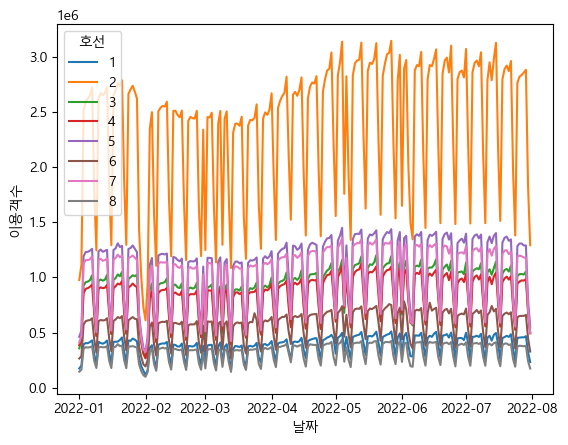

In [277]:
# 시계열 데이터의 시각화 
sns.lineplot(data=agg, 
             x='날짜',
             y='이용객수',
             hue='호선')

#### [실습] df_accident를 활용하여 7, 8월 새벽 1~5시 사고 건수 계산

In [278]:
df_accident = pd.read_csv('data/도로교통공단_사망 교통사고 정보_20211231_utf8.csv')
df_accident

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X(UTMK),발생위치Y(UTMK),경도,위도
0,2021,2021-01-01 03:00,야,금,1,3,0,3,0,경북,...,추돌,안전운전 의무 불이행,교차로,교차로부근,승용차,승용차,1097010.0,1793385.0,128.578152,36.132653
1,2021,2021-01-01 09:00,주,금,1,0,0,0,0,충남,...,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,902369.0,1847109.0,126.408201,36.616845
2,2021,2021-01-01 15:00,주,금,1,0,0,0,0,강원,...,측면충돌,안전운전 의무 불이행,교차로,교차로내,원동기장치자전거,승용차,1123975.0,1974509.0,128.907484,37.761842
3,2021,2021-01-01 19:00,야,금,1,0,0,0,0,전남,...,횡단중,안전운전 의무 불이행,단일로,기타단일로,화물차,보행자,886507.0,1613961.0,126.263573,34.513391
4,2021,2021-01-01 21:00,야,금,1,0,0,0,0,경기,...,기타,기타,단일로,기타단일로,승용차,보행자,953522.0,1915403.0,126.976011,37.236327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2811,2021,2021-12-31 16:00,주,금,1,0,0,0,0,경북,...,정면충돌,안전운전 의무 불이행,교차로,교차로내,승용차,이륜차,1119020.0,1766895.0,128.818730,35.891434
2812,2021,2021-12-31 17:00,주,금,1,0,0,0,0,제주,...,추돌,안전운전 의무 불이행,단일로,기타단일로,화물차,화물차,940588.0,1503049.6,126.860248,33.517699
2813,2021,2021-12-31 18:00,야,금,1,0,0,0,0,강원,...,횡단중,보행자 보호의무 위반,단일로,기타단일로,승용차,보행자,1023127.0,1982332.0,127.762845,37.840465
2814,2021,2021-12-31 19:00,야,금,1,0,0,0,0,경북,...,횡단중,보행자 보호의무 위반,교차로,교차로횡단보도내,승용차,보행자,1058805.0,1824755.0,128.155943,36.418521


In [293]:
df_accident['발생년월일시'] = pd.to_datetime(df_accident['발생년월일시'])
df_accident['발생월'] = df_accident['발생년월일시'].dt.month
df_accident['발생시'] = df_accident['발생년월일시'].dt.hour
df_accident[( df_accident['발생월'].isin([7,8])) & ( df_accident['발생시'].isin(range(1,6)))].shape[0]

74

#### End of script